In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

<font size="8" color="Black">Part 1 and 2</font>

,RegionName,Average Price,Date,Year
0,"New York, NY",179016.866340,2000-01-31,2000
1,"Los Angeles, CA",225229.750975,2000-01-31,2000
2,"Chicago, IL",140260.935566,2000-01-31,2000
3,"Dallas, TX",128720.957496,2000-01-31,2000
4,"Houston, TX",117733.849496,2000-01-31,2000
...,...,...,...,...
1390,"New York, NY",568543.199929,2023-03-31,2023
1391,"Los Angeles, CA",873619.353300,2023-03-31,2023
1392,"Chicago, IL",289343.730912,2023-03-31,2023
1393,"Dallas, TX",368252.408975,2023-03-31,2023


/tmp/ipykernel_6704/568241480.py:12: FutureWarning: The operation <function mean at 0x7f9a08766320> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  prices = prices.groupby(['Year', 'RegionName']).aggregate(np.mean)


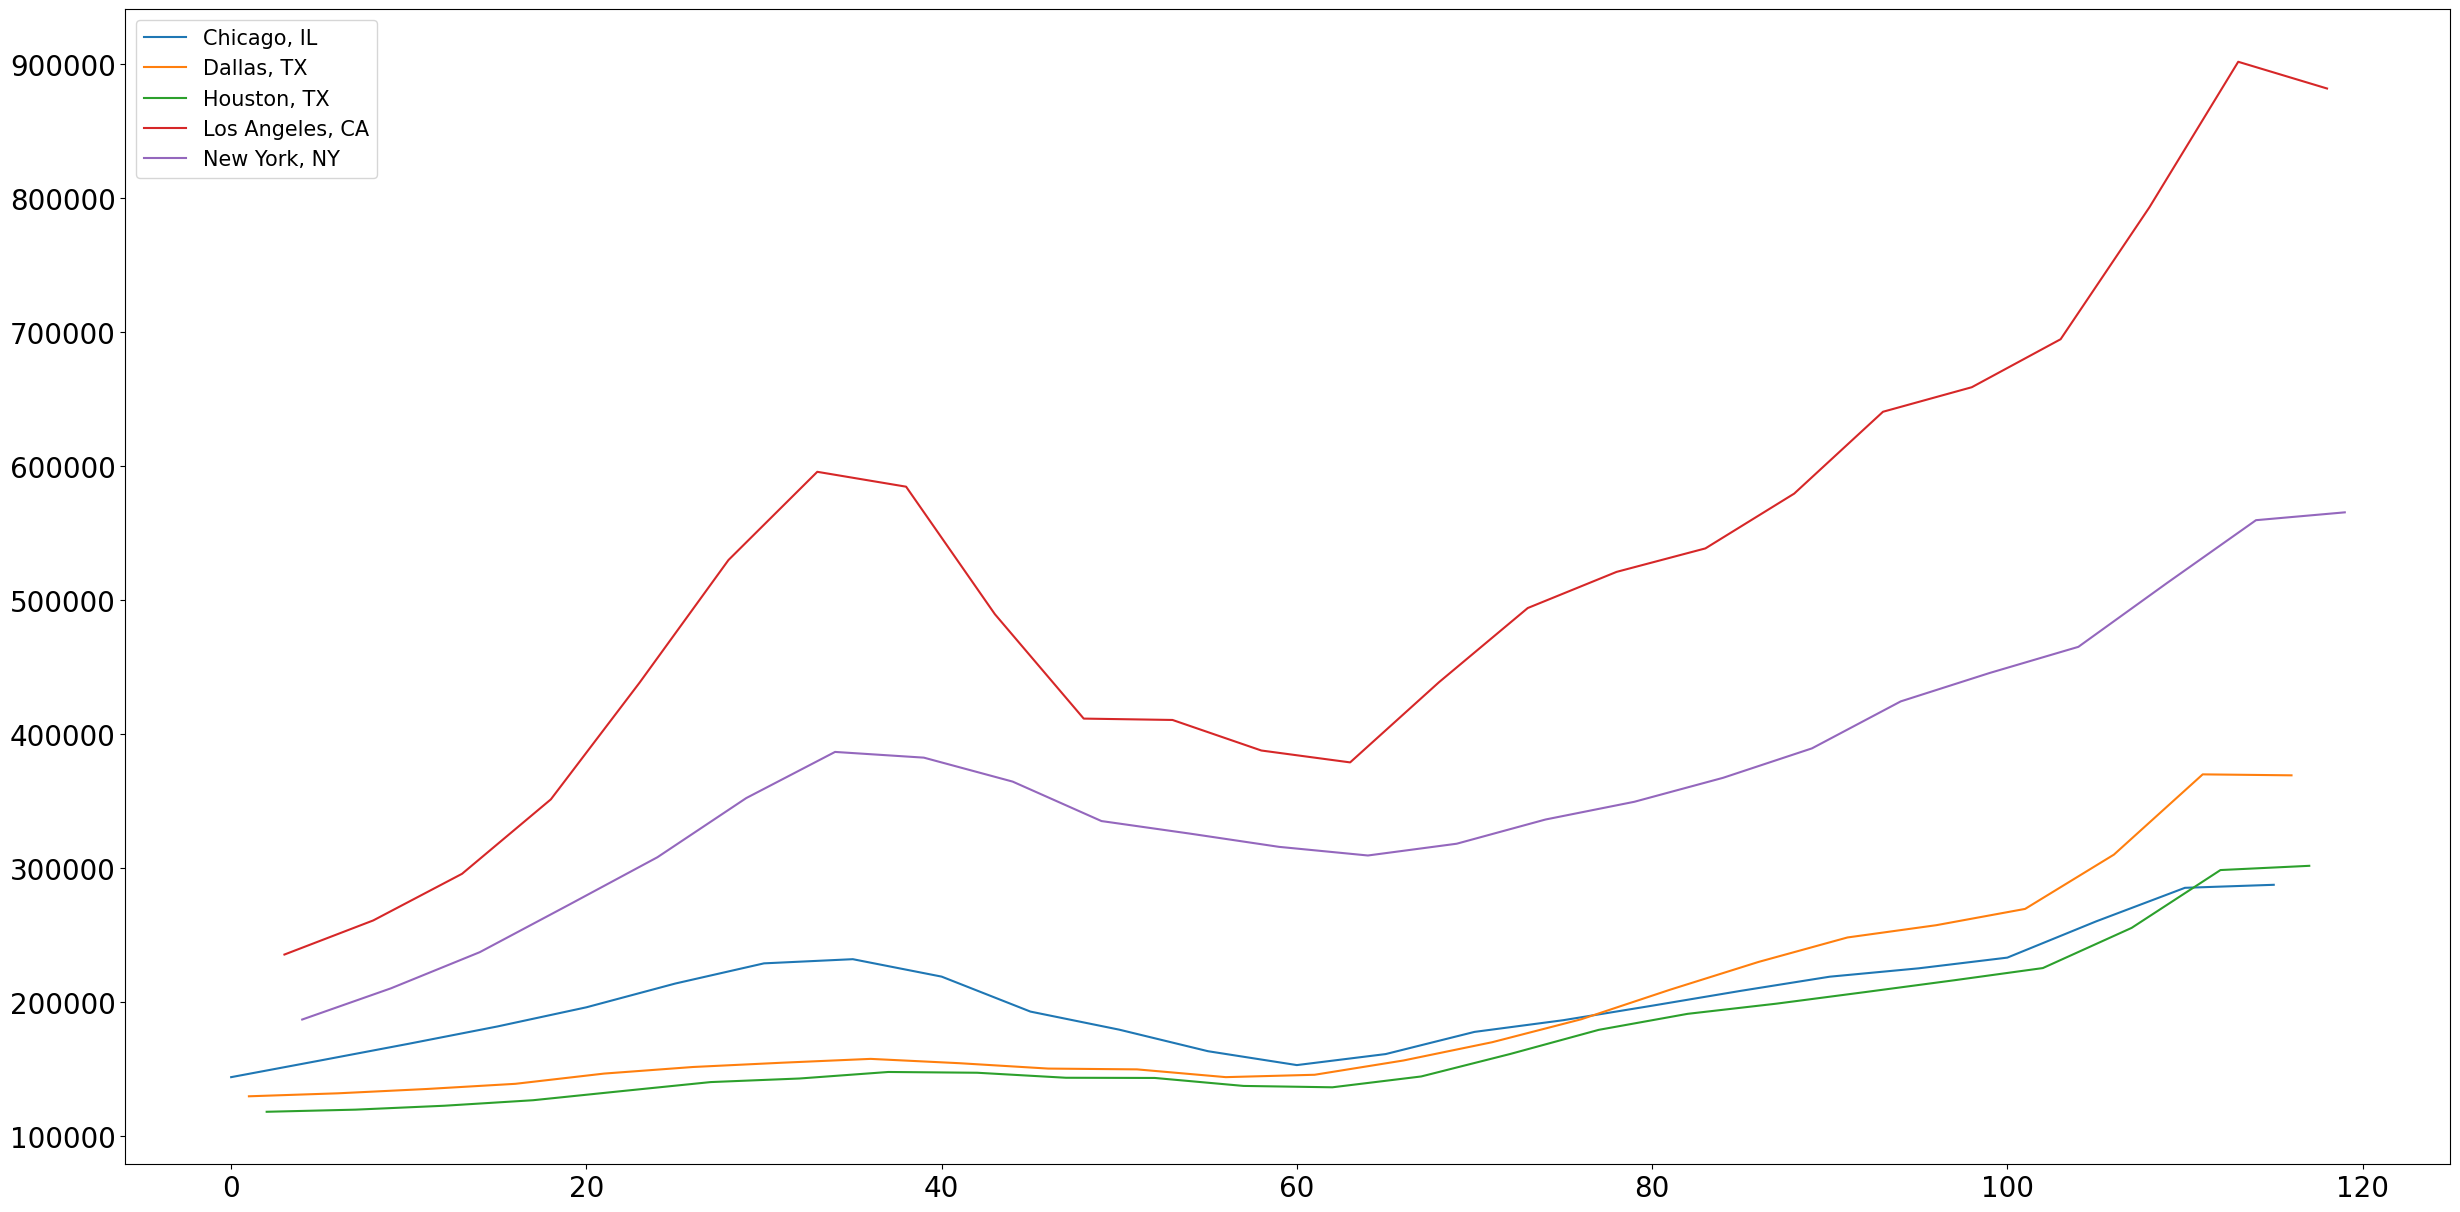

,Year,City,Average Price
0,2000,"Chicago, IL",144210.742048
1,2000,"Dallas, TX",129926.866266
2,2000,"Houston, TX",118371.138355
3,2000,"Los Angeles, CA",235702.243852
4,2000,"New York, NY",187211.522252
...,...,...,...
115,2023,"Chicago, IL",287741.033592
116,2023,"Dallas, TX",369431.030591
117,2023,"Houston, TX",301907.494031
118,2023,"Los Angeles, CA",881948.352043


In [8]:
# Extract data of housing price average f| 5 most populated cities in US
#pd.set_option('display.max_rows', 500)
prices = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv').head(6).tail(-1)
prices = pd.melt(prices, id_vars=['RegionName'], value_vars=prices.columns[5:])
prices['Date'] = pd.to_datetime(prices['variable'])
prices['Date'] = prices['Date'].astype('str')
prices = prices.drop('variable', axis=1).rename(columns={'value': 'Average Price'})
prices['Date'] = pd.DatetimeIndex(prices['Date'])
prices['Year'] = pd.DatetimeIndex(prices['Date']).year
prices.drop(columns='Date', axis=1)
display(prices)
prices = prices.groupby(['Year', 'RegionName']).aggregate(np.mean)
prices = prices.reset_index()
# Plot the avergae house price per month for each city
fig, ax = plt.subplots()
prices = prices.rename(columns={'RegionName': 'City'})
prices.groupby('City')['Average Price'].plot(x='Year', y='Average Price', figsize=(30, 15), ax=ax)
plt.legend(prop={'size': 15})
plt.rcParams.update({'font.size': 20})
plt.show()
prices

This is our code to gather data on the median house price for each of our 5 cities since 2000. All it is is a bunch
of data tidying to organize our table into a readable format. We have also included a graph that shows how each city's
median house price has changed based on the table. 

In [3]:
# This function drops rows that combine multiple cities (which makes no sense) after melting
def drop_invalid(df):
    cities = [] 
    for index, row in df.iterrows():
        if ('New York' in row['variable'] and row['City'] == 'New York, NY'):
            cities.append('New York, NY')
        elif ('Los Angeles' in row['variable'] and row['City'] == 'Los Angeles, CA'):
            cities.append('Los Angeles, CA')
        elif ('Chicago' in row['variable'] and row['City'] == 'Chicago, IL'):
            cities.append('Chicago, IL')
        elif ('Houston' in row['variable'] and row['City'] == 'Houston, TX'):
            cities.append('Houston, TX')
        elif ('Dallas' in row['variable'] and row['City'] == 'Dallas, TX'):
            cities.append('Dallas, TX')
        else:
            df = df.drop(index)
     
    df['City'] = cities      
    return df.drop('variable',axis=1)


# Read the data 
df = pd.read_csv('demographics.csv')
df['Year'] = pd.DatetimeIndex(df['date']).year
# Get recent data 
df = df[(df['Year'] > 2011)] 
df = df.drop('date', axis=1)

# DATA TIDYING. VERY MESSY, LOTS OF MELTING, BUT NECESSARY
df2 = df.head(10)
df = df.tail(-10)
df = df.groupby('Year').aggregate(np.mean)
df = df.fillna(df2.set_index('Year')).reset_index()
            
df = pd.melt(df, id_vars=['Year',
       'Los Angeles Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Los Angeles Count_Person',
       'Chicago Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Chicago Count_Person',
       'New York City Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'New York City Count_Person',
       'Dallas Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Dallas Count_Person',
       'Houston Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
       'Houston Count_Person', 'Los Angeles UnemploymentRate_Person',
       'Chicago UnemploymentRate_Person',
       'New York City UnemploymentRate_Person',
       'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
       'Los Angeles Median_Income_Household',
       'Chicago Median_Income_Household',
       'New York City Median_Income_Household',
       'Dallas Median_Income_Household', 'Houston Median_Income_Household'], value_name='Population under poverty line', 
             value_vars=['Los Angeles Count_Person_BelowPovertyLevelInThePast12Months', 'Chicago Count_Person_BelowPovertyLevelInThePast12Months',
             'New York City Count_Person_BelowPovertyLevelInThePast12Months',
            'Houston Count_Person_BelowPovertyLevelInThePast12Months',
            'Dallas Count_Person_BelowPovertyLevelInThePast12Months'])  

cities = [] 
for index, row in df.iterrows():
    if ('New York City' in row['variable']):
        cities.append('New York, NY')
    elif ('Los Angeles' in row['variable']):
        cities.append('Los Angeles, CA')
    elif ('Chicago' in row['variable']):
        cities.append('Chicago, IL')
    elif ('Houston' in row['variable']):
        cities.append('Houston, TX')
    else:
        cities.append('Dallas, TX')
     
df['City'] = cities      
df = df.drop('variable',axis=1)

df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Los Angeles Count_Person', 'City',
                        'Chicago Count_Person',
                        'New York City Count_Person',
                        'Dallas Count_Person',
                        'Houston Count_Person', 'Los Angeles UnemploymentRate_Person',
                        'Chicago UnemploymentRate_Person',
                        'New York City UnemploymentRate_Person',
                        'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
                        'Los Angeles Median_Income_Household',
                        'Chicago Median_Income_Household',
                        'New York City Median_Income_Household',
                        'Dallas Median_Income_Household', 'Houston Median_Income_Household'], value_name='Population with Bachelors or Higher',       
             value_vars=['Los Angeles Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',         
                        'Chicago Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'New York City Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'Dallas Count_Person_EducationalAttainmentBachelorsDegreeOrHigher',
                        'Houston Count_Person_EducationalAttainmentBachelorsDegreeOrHigher'])

df = drop_invalid(df)

df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Population with Bachelors or Higher', 'City',
                            'Los Angeles UnemploymentRate_Person',
                            'Chicago UnemploymentRate_Person',
                            'New York City UnemploymentRate_Person',
                            'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person',
                            'Los Angeles Median_Income_Household',
                            'Chicago Median_Income_Household',
                            'New York City Median_Income_Household',
                            'Dallas Median_Income_Household', 'Houston Median_Income_Household'], 
             value_name='Total Population', value_vars=['Los Angeles Count_Person',
                                                        'Chicago Count_Person',
                                                      'New York City Count_Person',
                                                        'Dallas Count_Person',
                                                        'Houston Count_Person'])
df = drop_invalid(df)
df = pd.melt(df, id_vars=['Year', 'Population under poverty line', 'Population with Bachelors or Higher', 'Total Population', 'City',
                        'Los Angeles Median_Income_Household',
                        'Chicago Median_Income_Household',
                        'New York City Median_Income_Household',
                        'Dallas Median_Income_Household', 'Houston Median_Income_Household'], 
             value_name='Unemployment Rate', value_vars=['Los Angeles UnemploymentRate_Person',
                                                        'Chicago UnemploymentRate_Person',
                                                        'New York City UnemploymentRate_Person',
                                                        'Dallas UnemploymentRate_Person', 'Houston UnemploymentRate_Person'])
df = drop_invalid(df)
df = pd.melt(df, id_vars=['Year', 'City', 'Population under poverty line', 'Population with Bachelors or Higher', 'Total Population', 'Unemployment Rate'], 
             value_name='Median Household Income', value_vars=['Los Angeles Median_Income_Household',
                                   'Chicago Median_Income_Household',
                                   'New York City Median_Income_Household',
                                   'Dallas Median_Income_Household', 'Houston Median_Income_Household'])
df = drop_invalid(df)

for index, row in df.iterrows():
    if (pd.isna(row['Population with Bachelors or Higher']) or pd.isna(row['Total Population']) or pd.isna(row['Unemployment Rate']) or pd.isna(row['Median Household Income'])):
        df = df.drop(index)
df = df.reset_index().drop('index', axis=1)
df['Percent of Population with Bachelors or Higher'] = 100 * df['Population with Bachelors or Higher'] / df['Total Population']
df['Percent of Population Under Poverty Line'] = 100 * df['Population under poverty line'] / df['Total Population']
df = df.drop('Population with Bachelors or Higher', axis=1).drop('Population under poverty line', axis=1)
df

,Year,City,Total Population,Unemployment Rate,Median Household Income,Percent of Population with Bachelors or Higher,Percent of Population Under Poverty Line
0,2012,"Los Angeles, CA",3847857.0,11.608333,49745.0,20.022236,20.554324
1,2013,"Los Angeles, CA",3877721.0,10.325000,49497.0,20.266543,21.278761
2,2014,"Los Angeles, CA",3904102.0,8.716667,49682.0,20.711677,21.789031
3,2015,"Los Angeles, CA",3933644.0,7.075000,50205.0,21.255406,21.541909
4,2016,"Los Angeles, CA",3957520.0,5.358333,51538.0,21.700282,20.945971
5,2017,"Los Angeles, CA",3975067.0,4.841667,54501.0,22.310819,19.881929
6,2018,"Los Angeles, CA",3981140.0,4.641667,58385.0,22.966286,18.620219
7,2019,"Los Angeles, CA",3982885.0,4.483333,62142.0,23.662873,17.599077
8,2020,"Los Angeles, CA",3889834.0,12.441667,65290.0,25.351827,16.935170
9,2012,"Chicago, IL",2719039.0,10.033333,47408.0,22.021751,21.618189


We gathered this data off using a census tool that allows us to combine data into tables, which is how we got the csv.
Although we initially had all the data in the table, it was unusable. In order to make it usable and readable, we had to
melt it a good amount as you can see above. Although it was messy, we were able to tidy the data into one nice table that shows
demographics data on the cities from 2012-2020.

In [4]:
final_df = df.merge(prices, on=["City", "Year"])
final_df

,Year,City,Total Population,Unemployment Rate,Median Household Income,Percent of Population with Bachelors or Higher,Percent of Population Under Poverty Line,Average Price
0,2012,"Los Angeles, CA",3847857.0,11.608333,49745.0,20.022236,20.554324,379082.694873
1,2013,"Los Angeles, CA",3877721.0,10.325000,49497.0,20.266543,21.278761,438888.008151
2,2014,"Los Angeles, CA",3904102.0,8.716667,49682.0,20.711677,21.789031,494273.456025
3,2015,"Los Angeles, CA",3933644.0,7.075000,50205.0,21.255406,21.541909,521239.517251
4,2016,"Los Angeles, CA",3957520.0,5.358333,51538.0,21.700282,20.945971,538760.676915
5,2017,"Los Angeles, CA",3975067.0,4.841667,54501.0,22.310819,19.881929,579642.556521
6,2018,"Los Angeles, CA",3981140.0,4.641667,58385.0,22.966286,18.620219,640730.051762
7,2019,"Los Angeles, CA",3982885.0,4.483333,62142.0,23.662873,17.599077,659043.497758
8,2020,"Los Angeles, CA",3889834.0,12.441667,65290.0,25.351827,16.935170,694846.366485
9,2012,"Chicago, IL",2719039.0,10.033333,47408.0,22.021751,21.618189,153212.164828


Now, all we got to do is merge the two tables into one table with all our data for each year. This is what we will use 
for the future parts.

<font size="8" color="Black">Part 3</font>

<font size="8" color="Black">Part 4</font>

<font size="8" color="Black">Part 5</font>

<font size="8" color="Black">Part 6</font>